<a href="https://colab.research.google.com/github/satanthedoge/projet-ia-a4/blob/main/NotebookProjet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook projet Intelligence Artificielle - Groupe 1


Rappel de la demande : L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi. La direction fait donc appel à nous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

# 1. Data Preprocessing

Cette étape compte pour une grande partie du projet, il faut nettoyer et formatter les fichiers reçus pour qu'ils soient exploitables par notre modèle. Les fichiers en question :
- **general_data.csv** : Nombre de données concernant les employés.
- **ManagerSurvey.csv** : Dernière évaluation du manager.
- **EmployeeSurvey.csv** : Enquête qualité de vie au travail.
- **Time_in.csv/Time_out.csv** : Horaires de travail.

Il faut ensuite les combiner pour obtenir un DataFrame exploitable par un algorithme de Machine Learning.

## 1.1 Détection d'anomalies

Avant de commencer le traitement de données, il faut analyser les fichiers et énumérer les anomalies dans chacuns d'entre eux. Certaines anomalies sont communes à tous les fichiers commes les doublons et les attributs manquants, tandis que d'autres sont propres à chaque fichier.

**Anomalies rencontrées :**
- Doublons.
- Attributs manquants.
- Attributs similaires sur toute une colonne.
- Attributs non numériques.
- Données aberrantes.

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#Read csv file with no separator
def load_data(path):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)

#Read csv file with separator
def load_data_sep(path):
    csv_path=os.path.join(path)
    return pd.read_csv(csv_path, sep=";")

## 1.2 general_data.csv :
Ce fichier contient les données des employés.



In [4]:
general_data= load_data("./dataset/general_data.csv")

In [5]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


### 1.2.1 Suppression des attributs similaires et remplacement des valeurs manquantes
Le bloc de code suivant contient:
- La suppression des attributs similaires(EmployeeCount, Over18, StandardHours)
- Le remplacement des valeurs manquantes dans la colonne 'NumCompaniesWorked' par la valeur 1(35% de présence).
- Le remplacement des valeurs manquantes dans la colonne 'TotalWorkingYears' par une valeur aléatoire entre les 5 premières valeurs.

In [6]:
#Suppression des attributs similaires
general_data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], axis='columns', inplace=True)

#Remplacement 'NumCompaniesWorked'
general_data["NumCompaniesWorked"].fillna(value=1, inplace=True)

#Remplacement 'TotalWorkingYears'
general_data["TotalWorkingYears"].fillna(value=7, inplace=True)

In [7]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


### 1.2.2 Attributs non numériques
Il faut encoder les attributs non numériques. Nous avons cependant deux types d'attributs : **ordinaux** et **non ordinaux**.

Pour les attributs ordinaux, il suffit simplement de remplacer les valeurs non numériques par des valeurs numériques dans la même colonne :
- Business Travel.
- Age.
- Salary.
- Attrition.


Pour les attributs non ordinaux, il faut implémenter un **one hot encoding** qui créera des colonnes pour chaque classe d'un attribut et supprimera la colonne originale :
- Department.
- EducationField.
- Gender.

**Note** : Étant donné le grand intervalle de données pour les âges et les salaires, il est préférable de créer des plages de données respectives et les convertir en encodage ordinal.

In [ ]:
#Ordinal encoding
#Age
bins = [17, 24, 31, 38, 45, 52, 60]
labels = ['18-24', '25-31', '32-38', '39-45', '46-52', '53-60']

general_data['AgeRange'] = pd.cut(general_data['Age'], bins, labels=labels)
general_data[['EmployeeID','Age','AgeRange']]

ar_scalemapper = {'18-24': 1, '25-31': 2, '32-38': 3, '39-45': 4, '46-52': 5, '53-60': 6}
general_data["AgeRange_Scale"] = general_data["AgeRange"].replace(ar_scalemapper)

#Salary
bins2 = [10089, 23176, 26958, 33169, 42288, 49190, 57434, 68860, 98600, 137756, 199990]
labels2 = ['10090-23176', '23177-26958', '26959-33169', '33170-42288', '42289-49190', '49191-57434','57435-68860', '68861-98600', '98601-137756', '137757-199990']

general_data['SalaryRange'] = pd.cut(general_data['MonthlyIncome'], bins2,labels=labels2)
general_data[['EmployeeID','MonthlyIncome','SalaryRange']]

sr_scalemapper = {'10090-23176': 1, '23177-26958': 2, '26959-33169': 3, '33170-42288': 4, '42289-49190': 5, '49191-57434': 6,'57435-68860': 7, '68861-98600': 8, '98601-137756': 9, '137757-199990': 10}
general_data["SalaryRange_Scale"] = general_data["SalaryRange"].replace(sr_scalemapper)

#Business Travel
bt_scalemapper = {'Non-Travel': 1, 'Travel_Rarely': 2, 'Travel_Frequently': 3}
general_data["BusinessTravel_Scale"] = general_data["BusinessTravel"].replace(bt_scalemapper)

#Manually remove original columns
general_data.drop(columns=['BusinessTravel','MonthlyIncome','Age','AgeRange','SalaryRange'], axis='columns',inplace=True)

In [ ]:
#One hot encoding
general_data=pd.get_dummies(general_data, columns=['MaritalStatus','Department','EducationField','JobRole','Gender'])

In [ ]:
general_data.head()

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male
0,No,6,2,1,1,1.0,11,0,1.0,6,...,0,0,0,0,0,0,0,0,1,0
1,Yes,10,1,2,1,0.0,23,1,6.0,3,...,0,0,0,0,0,1,0,0,1,0
2,No,17,4,3,4,1.0,15,3,5.0,2,...,0,0,0,0,0,0,1,0,0,1
3,No,2,5,4,3,3.0,11,3,13.0,5,...,1,0,0,0,0,0,0,0,0,1
4,No,10,1,5,1,4.0,12,2,9.0,2,...,0,0,0,0,0,0,1,0,0,1


## 1.2 Manager_survey.csv & Employee_surver.csv

Ces deux fichiers sont traités en parallèle car ils possèdent quasiment les mêmes caractéristiques.

**Manager survey:** Contient les évaluations des managers sur les employés.

**Employee surver:** Contient les évaluations des employés sur l'entreprise.

In [ ]:
manager_survey=load_data("./dataset/manager_survey_data.csv")
employee_survey=load_data("./dataset/employee_survey_data.csv")

In [ ]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
#Creation du merged dataset
survey=pd.concat([employee_survey,manager_survey], axis=1, join='inner')

In [ ]:
survey.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,2205.500000,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,1273.201673,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,2205.500000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,4410.000000,4.000000,4.000000


### 1.2.1 Attributs similaires

Nous avons observé deux similarités . Il faut dans ce cas supprimer un des deux attributs pour alléger notre DataFrame. Le choix de l'attribut à supprimer se fera en fonction du nombre de valeurs manquantes présentes dans chaque attribut.


**JobInvolvment/WorkLifeBalance**: Respectivement 0 et 39 valeurs manquantes. WorkLifeBalance sera supprimé.

**EnvironmentSatisfaction/JobSatisfaction**: Respectivement 25 et 20 valeurs manquantes. EnvironmentSatisfaction sera supprimé.

In [ ]:
#Delete WorkLifeBalance and EnvironmentSatisfaction
survey.drop(columns=['WorkLifeBalance','EnvironmentSatisfaction'], axis='columns',inplace=True)

### 1.2.2 Attributs manquants

Les techniques choisies pour remplacer les attributs manquants sont le **backward** et le **forward filling**. Cela consiste à remplacer la valeur manquante par celle d'avant ou après dans la colonne.

In [ ]:
#Backward filling
survey.ffill(inplace=True)

#Forwars filling
survey.bfill(inplace=True)

In [ ]:
survey.head()

,EmployeeID,JobSatisfaction,EmployeeID,JobInvolvement,PerformanceRating
0,1,4.0,1,3,3
1,2,2.0,2,2,4
2,3,2.0,3,3,3
3,4,4.0,4,2,3
4,5,1.0,5,3,3


## 1.3 In_time.csv & out_time.csv


Ce fichier contient les heures de pointage des employés au cours de l'année 2015 à la seconde près. L'objectif du traitement de ce fichier et de sortir des statistiques que l'on utilisera comme attributs dans le DataFrame central.

In [ ]:
time_in=load_data("dataset/in_time.csv")
time_out=load_data("dataset/out_time.csv")

In [ ]:
time_in.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [ ]:
time_out.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


### 1.3.1 Suppression des attributs manquants

Nous avons ici deux cas de figure. Lorsqu'une valeur est manquante, il peut s'agir d'une absence ou d'un oubli de pointage. Lorsque toute la colonne est manquante, il s'agit d'un jour férié. Il faut alors supprimer les jours fériés et **garder** le reste des valeurs manquantes pour compter les absences.

In [ ]:
#first cleanning round
#dropping column where no one is working (assumed to be week-ends or holiday)
time_in = time_in.dropna(axis='columns', how ='all')
time_out = time_out.dropna(axis='columns', how ='all')

### 1.3.2 Statistiques

Nous allons en premier temps recueillir les moyennes de temps d'entrée et de sortie pour chaque employé.

In [ ]:
from datetime import datetime,date,timedelta

#Median time in 

list_median_in = []

for k in range(0,len(time_in)):
    row = time_in.iloc[k]
    row = pd.to_datetime(row, errors='coerce').dt.strftime("%H:%M:%S")

    dates = list(row.sort_values())
    date_median = dates[len(dates)//2]
    list_median_in.append(date_median)
    
       

#Median time out

list_median_out = []

for k in range(0,len(time_out)):
    row = time_out.iloc[k]
    row = pd.to_datetime(row, errors='coerce').dt.strftime("%H:%M:%S")

    dates = list(row.sort_values())
    date_median = dates[len(dates)//2]
    list_median_out.append(date_median)

In [ ]:
# Creating dataframe with EmployeeID only
cleandf = general_data['EmployeeID'].copy()


In [ ]:
#add median time column to clean dataframe 
cleandf = pd.DataFrame(cleandf) 
cleandf = cleandf.assign(median_time_in = list_median_in) 
cleandf = cleandf.assign(median_time_out = list_median_out)

#show dataframe t
cleandf.head()

,EmployeeID,median_time_in,median_time_out
0,1,10:01:19,17:26:03
1,2,09:59:32,17:45:04
2,3,10:02:13,17:02:08
3,4,10:00:05,17:13:35
4,5,09:59:22,18:00:03


In [ ]:
#get min and max time in 
listmin = []
listmax = []
#iterate through dataframe
for k in range(0,len(time_in)):
    #load row 
    row = time_in.iloc[k]
    
    row = pd.to_datetime(row, errors='coerce').dt.strftime("%H:%M:%S")
        
    dates = list(row.sort_values())
    date_min = dates[0]
    dates = list(row.sort_values(ascending=False))
    date_max = dates[0]
    listmin.append(date_min)
    listmax.append(date_max)
        
        
        
        
cleandf = cleandf.assign(min_time_in = listmin)
cleandf = cleandf.assign(max_time_in = listmax) 
cleandf.head()   

,EmployeeID,median_time_in,median_time_out,min_time_in,max_time_in
0,1,10:01:19,17:26:03,00:00:00,10:37:59
1,2,09:59:32,17:45:04,00:00:00,10:43:29
2,3,10:02:13,17:02:08,00:00:00,10:52:27
3,4,10:00:05,17:13:35,00:00:00,10:50:44
4,5,09:59:22,18:00:03,00:00:00,10:54:55


In [ ]:
#get min and max time out
listmin = []
listmax = []
#iterate through dataframe
for k in range(0,len(time_out)):
    #load row 
    row = time_out.iloc[k]
    
    row = pd.to_datetime(row, errors='coerce').dt.strftime("%H:%M:%S")
        
    dates = list(row.sort_values())
    date_min = dates[0]
    dates = list(row.sort_values(ascending=False))
    date_max = dates[0]
    listmin.append(date_min)
    listmax.append(date_max)
        
        
        
        
cleandf = cleandf.assign(min_time_out = listmin)
cleandf = cleandf.assign(max_time_out = listmax) 
cleandf.head()

,EmployeeID,median_time_in,median_time_out,min_time_in,max_time_in,min_time_out,max_time_out
0,1,10:01:19,17:26:03,00:00:00,10:37:59,00:00:00,18:14:06
1,2,09:59:32,17:45:04,00:00:00,10:43:29,00:00:00,18:49:53
2,3,10:02:13,17:02:08,00:00:00,10:52:27,00:00:00,18:07:51
3,4,10:00:05,17:13:35,00:00:00,10:50:44,00:00:00,18:10:16
4,5,09:59:22,18:00:03,00:00:00,10:54:55,00:00:00,19:22:01


In [ ]:
import math
#get number of days where an employee was absent 
mean_daily = []
nb_absent = []
taux_absent = []
maxdays = 249 
for k in range(0,len(time_in)):
    row_out = time_out.iloc[k]
    row_in = time_in.iloc[k]
    
    row_out = pd.to_datetime(row_out , errors='coerce').dt.strftime("%H:%M:%S")
    row_in = pd.to_datetime(row_in, errors='coerce').dt.strftime("%H:%M:%S")
    absentdays = 0
    daily = timedelta(0)
    taux = 0
    for j in range(1,len(row_out)):
        if pd.notnull(row_out[j]):
            daily += (pd.to_timedelta(row_out[j])-pd.to_timedelta(row_in[j]))
        if pd.isnull(row_out[j]):
            absentdays += 1
            
    daily = daily / maxdays 
    taux = round((absentdays/249), 2)
        
    mean_daily.append(daily) 
    nb_absent.append(absentdays) 
    taux_absent.append(taux) 


In [ ]:
#Create columns

cleandf['mean_daily_spent']= mean_daily
cleandf['total_abs']= nb_absent
cleandf['taux_abs']= taux_absent
cleandf.head()

,EmployeeID,median_time_in,median_time_out,min_time_in,max_time_in,min_time_out,max_time_out,mean_daily_spent,total_abs,taux_abs
0,1,10:01:19,17:26:03,00:00:00,10:37:59,00:00:00,18:14:06,0 days 06:52:12.823293172,17,0.07
1,2,09:59:32,17:45:04,00:00:00,10:43:29,00:00:00,18:49:53,0 days 07:18:57.493975903,13,0.05
2,3,10:02:13,17:02:08,00:00:00,10:52:27,00:00:00,18:07:51,0 days 06:48:57.891566265,7,0.03
3,4,10:00:05,17:13:35,00:00:00,10:50:44,00:00:00,18:10:16,0 days 06:47:21.172690763,14,0.06
4,5,09:59:22,18:00:03,00:00:00,10:54:55,00:00:00,19:22:01,0 days 07:52:39.220883534,4,0.02


In [ ]:
#keep only hours for mean time for better use 
listhours = []
for k in range(0,len(cleandf['mean_daily_spent'])):
    hours = pd.to_timedelta(cleandf['mean_daily_spent'].iloc[k]).seconds//3600
    listhours.append(hours)
    
cleandf['round_mean_daily_spent']= listhours 

cleandf.head()

,EmployeeID,median_time_in,median_time_out,min_time_in,max_time_in,min_time_out,max_time_out,mean_daily_spent,total_abs,taux_abs,round_mean_daily_spent
0,1,10:01:19,17:26:03,00:00:00,10:37:59,00:00:00,18:14:06,0 days 06:52:12.823293172,17,0.07,6
1,2,09:59:32,17:45:04,00:00:00,10:43:29,00:00:00,18:49:53,0 days 07:18:57.493975903,13,0.05,7
2,3,10:02:13,17:02:08,00:00:00,10:52:27,00:00:00,18:07:51,0 days 06:48:57.891566265,7,0.03,6
3,4,10:00:05,17:13:35,00:00:00,10:50:44,00:00:00,18:10:16,0 days 06:47:21.172690763,14,0.06,6
4,5,09:59:22,18:00:03,00:00:00,10:54:55,00:00:00,19:22:01,0 days 07:52:39.220883534,4,0.02,7


Après avoir produit les données statistiques des pointages, nous avons décidé de choisir le taux d'absenteisme(taux_abs) et le temps moyen quotidien passé au travail(round_mean_daily_spent)

In [ ]:
#Création du dataset à merge
cleantime=cleandf.drop(columns=['median_time_in','median_time_out','min_time_in','max_time_in','min_time_out'
                               ,'max_time_out','mean_daily_spent','total_abs'])

In [ ]:
cleantime.head()

,EmployeeID,taux_abs,round_mean_daily_spent
0,1,0.07,6
1,2,0.05,7
2,3,0.03,6
3,4,0.06,6
4,5,0.02,7


In [ ]:
bins = [-1, 0.03, 0.07, 0.1]
labels = ['0-0.03', '0.04-0.07', '0.08-0.1']

cleantime['AbsenteeismRateRange'] = pd.cut(cleantime['taux_abs'], bins, labels=labels)
cleantime[['EmployeeID','taux_abs','AbsenteeismRateRange']]

ar_scalemapper = {'0-0.03': 1, '0.04-0.07': 2, '0.08-0.1': 3}
cleantime["AbsenteeismRate_Scale"] = cleantime["AbsenteeismRateRange"].replace(ar_scalemapper)

## 1.4 Création du Dataset principal

Après traitement des données de chaque fichier, il faut les combiner en un dataset exploitable par notre modèle.

In [ ]:
survey.reset_index(drop=True,inplace=True)
cleantime.reset_index(drop=True,inplace=True)
general_data.reset_index(drop=True, inplace=True)

In [ ]:
#Concat Dataframes
data=pd.concat([general_data,cleantime,survey], axis=1, join='inner')

#Delete duplicate EmployeeID columns
data = data.loc[:,~data.columns.duplicated()]

### 1.4.1 Identification du label

L'objet de notre étude se base sur l'attribut 'Attrition'. Il nous informe si l'employé a quitté l'entreprise l'année suivante ou est resté.

Il faut alors l'encoder et le sortir de **data**.

In [ ]:
#Encode labels
attrition_scalemapper = {'Yes': 1, 'No': 0}
data["Attrition"] = data["Attrition"].replace(attrition_scalemapper)

In [ ]:
#Create labels DataFrame
labels=data["Attrition"]

#Duplicate DataFrame
dupli_data=data.copy()

#dupli_data.drop(columns=['taux_abs','AbsenteeismRateRange'], axis='columns',inplace=True)


In [ ]:
dupli_data.to_csv("dataset/dupli_data.csv", index = False)

In [ ]:
#Delete EmployeeID  Attrition from data
data.drop(columns=['Attrition','EmployeeID'], axis='columns', inplace=True)


# 2. Modélisation


Maintenant que le dataset est près, il faut maintenant construire notre modèle à partir de ces données. Dans le cadre de cette étude, nous voulons prédire si un employé est susceptible de quitter l'entreprise ou non via un **apprentissage supervisé**. Il s'agit alors d'une **classification binaire**.



## 2.1 Data splitting

Avant de commencer l'apprentissage, il faut split le dataset en différentes parties : **training set** et **testing set**. Ici aussi, plusieurs méthodes sont à notre disposition.

Pour rappel, nous devons faire une classification binaire. Cependant, le compte des valeurs d'attrition est déséquilibré(16,1% de Yes). Notre choix s'est alors porté sur le **StratifiedShuffleSplit** car il permet d'avoir une même distribution des labels dans les training et testing sets.

In [ ]:
data.head()

,DistanceFromHome,Education,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
0,6,2,1,1.0,11,0,1.0,6,1,0,...,0,0,0,1,0,0.07,6,4.0,3,3
1,10,1,1,0.0,23,1,6.0,3,5,1,...,1,0,0,1,0,0.05,7,2.0,2,4
2,17,4,4,1.0,15,3,5.0,2,5,0,...,0,1,0,0,1,0.03,6,2.0,3,3
3,2,5,3,3.0,11,3,13.0,5,8,7,...,0,0,0,0,1,0.06,6,4.0,2,3
4,10,1,1,4.0,12,2,9.0,2,6,0,...,0,1,0,0,1,0.02,7,1.0,3,3


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

x = data.values
y=labels.values

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20, random_state = 42)

train_index, test_index = list(split.split(x, y))[0]
x_train, y_train = x[train_index], y[train_index]
x_test, y_test = x[test_index], y[test_index]

## 2.2 Mise en place et choix de l'algorithme

> Il existe différents algorithmes de classification binaire, nous devons les tester et les comparer :
- **Support Vector Classifier**
- **Régression Logistique**
- **K-nearest neighbors**
- **Naive bayes**
- **Random Forest**
- **Perceptron**

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score

algos = {
    'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors = 2),
    'LogisticRegression'  : LogisticRegression(solver='liblinear', C = 3.4000569504969977, penalty = 'l2', random_state = 17),
    'SVC' : SVC(),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators = 10, random_state = 42),
    'GaussianNB': GaussianNB(),
    'Perceptron' : Perceptron(tol=1e-3, random_state=42)
}

f1_scores = dict()
cross_val_scores = dict()
rmse_scores = dict()
mae_scores = dict()

for algo_name in algos:
    alg = algos[algo_name]
    alg.fit(x_train, y_train)
    y_pred = alg.predict(x_test)
   
    f1_scores[algo_name] =  f1_score(y_test, y_pred)
   
    cv_result = cross_val_score(alg, x, y, cv = split, scoring ="accuracy")
    cross_val_scores[algo_name] = cv_result.mean()
   
    rmse_scores[algo_name] = mean_squared_error(y_test, y_pred, squared = False)
   
    mae_scores[algo_name] = mean_absolute_error(y_test, y_pred)

   
    scores = pd.DataFrame({"F1 Score":f1_scores,
                           "Cross-Validation Accuracy": cross_val_scores,
                           "RMSE": rmse_scores,
                           "MAE": mae_scores})

scores

,F1 Score,Cross-Validation Accuracy,RMSE,MAE
KNeighborsClassifier,0.806723,0.947846,0.228373,0.052154
LogisticRegression,0.260870,0.845805,0.392677,0.154195
SVC,0.000000,0.839002,0.401245,0.160998
RandomForestClassifier,0.978417,0.993197,0.082479,0.006803
GaussianNB,0.396761,0.831066,0.411016,0.168934
Perceptron,0.437710,0.810658,0.435135,0.189342


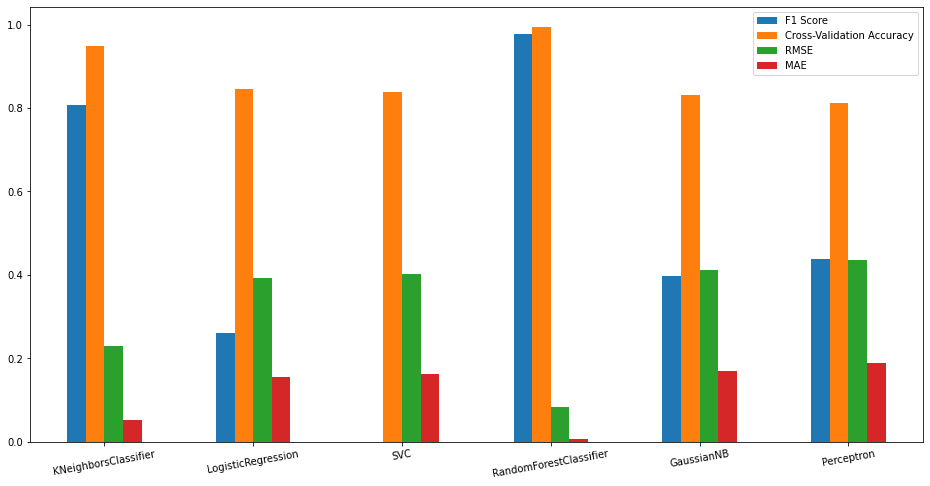

In [ ]:
#Score affichés en graphes
scores.plot(kind="bar", rot = 10, figsize=(16,8)) 
plt.show()

### 2.3 Validation de l'algorithme et optimisation

De part les résultats obtenus précédemment, il est évident que notre choix s'est porté sur le modèle utilisant l'algorithme Random Forest. Il faut maintenant l'optimiser et en tirer ses différents scores.



### 2.3.1 Grid Search

**Grid Search** (cross-validator) est une méthode d’optimisation (hyperparameter optimization) qui permet de tester une série de paramètres et de comparer les performances pour en déduire le meilleur paramétrage.

Dans le cas d'un Random Forest, le paramètre à choisir avec soin est le nombre d’arbres à créer (n_estimators) :

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': range(1, 500, 5)}

gridsearch = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=376,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = {'n_estimators': range(350, 450, 5)}

gridsearch = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=375,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = {'n_estimators': range(350, 400, 2)}

gridsearch = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=376,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = {'n_estimators': range(370, 380, 1)}

gridsearch = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=375,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 375, random_state = 42) # Changement du param nb. arbres après le Grid Search
classifier = classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) # Prédiction sur le test set

### 2.3.2 Erreur et perte

In [ ]:
# Errors

from sklearn.metrics import mean_squared_error
# moyenne arithmétique des valeurs absolues des écarts
rmse = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Squared Error : ', rmse)

from sklearn.metrics import mean_absolute_error
# moyenne des écarts en valeur absolue par rapport aux valeurs observées
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : ', mae)

# Losses

from sklearn.metrics import zero_one_loss,  matthews_corrcoef, hamming_loss, brier_score_loss
# Fraction des misclassifications
print('Zero One Loss : ', zero_one_loss(y_test, y_pred))

Root Mean Squared Error :  0.09523809523809523
Mean Absolute Error :  0.009070294784580499
Zero One Loss :  0.009070294784580546


### 2.3.3 Matrice de confusion

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['predicted_No', 'predicted_Yes'], index=['actual_No', 'actual_Yes']))

            predicted_No  predicted_Yes
actual_No            740              0
actual_Yes             8            134


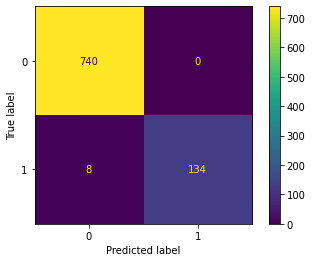

In [ ]:
from sklearn import metrics

metrics.plot_confusion_matrix(classifier, x_test, y_test)  
plt.show()

### 2.3.4 Scores

In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score, f1_score, fbeta_score, precision_recall_curve

# Score du classifieur
clf_score = classifier.score(x_test, y_test)
print('Classifier Score : ', clf_score)


# Score de la précision
print('Precision Score : ', precision_score(y_test, y_pred))
# Score du rappel
print('Recall Score : ', recall_score(y_test, y_pred))
# Score de la précision moyenne
print('Average Precision Score : ', average_precision_score(y_test, y_pred))
# Score F1
print('F1 Score : ', f1_score(y_test, y_pred))
# Score F Beta (F1 pondéré)
print('F Beta Score : ', fbeta_score(y_test, y_pred, beta= 0.5))

Classifier Score :  0.9909297052154195
Precision Score :  1.0
Recall Score :  0.9436619718309859
Average Precision Score :  0.9527322666155664
F1 Score :  0.9710144927536231
F Beta Score :  0.9882005899705013


### 2.3.5 Validation croisée

La validation croisée est, en Machine Learning, une méthode d’estimation de fiabilité d’un modèle fondée sur une technique d’échantillonnage.

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
cv = cross_validate(classifier, x, y, cv = split, scoring = ('neg_mean_squared_error'))
print('Cross validate : ', cv)
cv_predict = cross_val_predict(classifier, x, y, cv = 5)
print('Cross val predict : ', cv_predict)
cv_score = cross_val_score(classifier, x, y, cv = split)
print('Cross val score : ', cv_score)


cv_scores_mse = cross_val_score(classifier, x, y, scoring = "neg_mean_squared_error", cv = split)
cv_scores_accuracy = cross_val_score(classifier, x, y, scoring = "accuracy", cv = split)
cv_scores_f1 = cross_val_score(classifier, x, y, scoring = "f1", cv = split)

def display_scores(scores):
    print("Score :", scores)
    print("Mean :", scores.mean())
    print("Standard Deviation :", scores.std())

print('\nMean Squared Error : ')
display_scores(-cv_scores_mse)
print('\nAccuracy : ')
display_scores(cv_scores_accuracy)
print('\nF1 : ')
display_scores(cv_scores_f1)

Cross validate :  {'fit_time': array([1.45462441]), 'score_time': array([0.07608485]), 'test_score': array([-0.00907029])}
Cross val predict :  [0 1 0 ... 0 0 0]
Cross val score :  [0.99092971]

Mean Squared Error : 
Score : [0.00907029]
Mean : 0.009070294784580499
Standard Deviation : 0.0

Accuracy : 
Score : [0.99092971]
Mean : 0.9909297052154195
Standard Deviation : 0.0

F1 : 
Score : [0.97101449]
Mean : 0.9710144927536231
Standard Deviation : 0.0


### 2.3.6 Graphes

Precision-Recall Curve


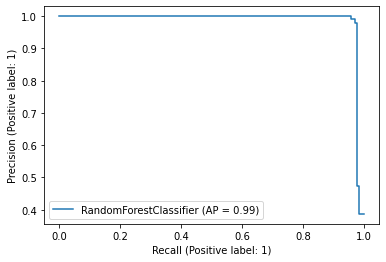

Receiver Operating Characteristic Curve


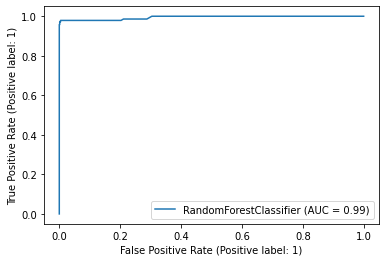

Detection Error Tradeoff Curve


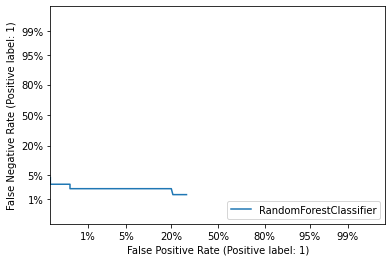

Learning Curve


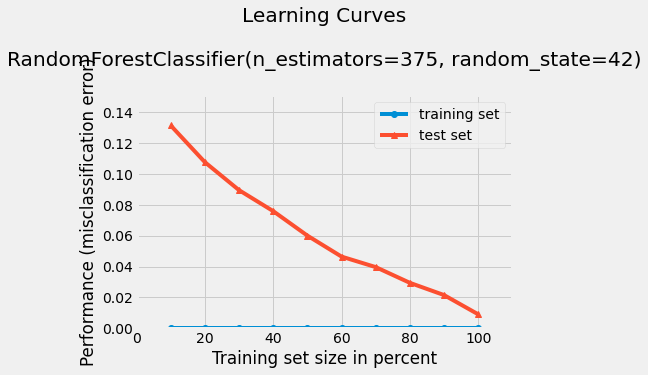

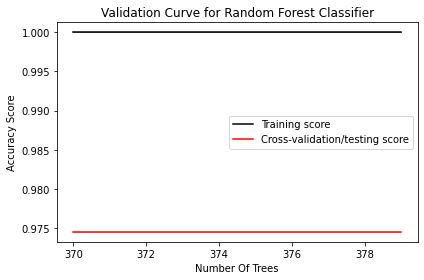

In [ ]:
print('Precision-Recall Curve')
metrics.plot_precision_recall_curve(classifier, x_test, y_test)  
plt.show()

print('Receiver Operating Characteristic Curve')
metrics.plot_roc_curve(classifier, x_test, y_test)  
plt.show() 

# Taux d'erreur représentant le taux de faux positif par rapport au taux de faux négatif.
print('Detection Error Tradeoff Curve')
metrics.plot_det_curve(classifier, x_test, y_test)   
plt.show() 

# Package additionnel à installer : mlxtend
from mlxtend.plotting import plot_learning_curves

# Courbe d'apprentissage (train/test)
print('Learning Curve')
plot_learning_curves(x_train, y_train, x_test, y_test, classifier)
plt.show()


# Courbe de validation (train/test)
from sklearn.model_selection import validation_curve

param_range = range(370, 380, 1)
train_scoreNum, test_scoreNum = validation_curve(classifier, X = x_train, y = y_train, param_name = 'n_estimators', param_range = param_range, cv = split)

train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation/testing score", color="red")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve for Random Forest Classifier")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


# 3 Baisse du taux d'attrition

## 3.1 Facteurs d'influence du turn-over

In [ ]:
x_novalues = data.copy()
features = pd.DataFrame({'features': x_novalues.columns, 'importance': classifier.feature_importances_})
features.sort_values('importance', ascending = False)

,features,importance
6,TotalWorkingYears,0.081513
8,YearsAtCompany,0.063520
38,round_mean_daily_spent,0.062041
0,DistanceFromHome,0.055713
11,AgeRange_Scale,0.049907
12,SalaryRange_Scale,0.048649
4,PercentSalaryHike,0.048070
10,YearsWithCurrManager,0.046179
3,NumCompaniesWorked,0.045137
39,JobSatisfaction,0.039246


<AxesSubplot:title={'center':'Top 5 important features'}>

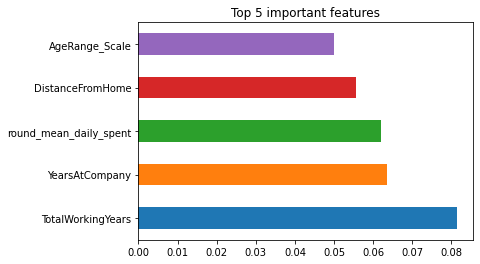

In [ ]:
# Top n important features plot
features_plot = pd.Series(classifier.feature_importances_, index = x_novalues.columns)
features_plot.nlargest(5).plot(kind='barh', title='Top 5 important features', color = ['C0', 'C1', 'C2', 'C3', 'C4'])

## 3.2 Pistes d'amélioration réduisant le turn-over

Après la validation du modèle, il est temps de passer à son utilisation pour obtenir des pistes sur les changement à effectuer afin de réduire le turn-over.

L'attribut le plus influent est TotalWorkingYears (~0.08/8%), on va prendre une marge de 5% et on obtient cette liste : 

In [ ]:
features.sort_values('importance', ascending = False) # 0.08 - 0.05 = 0.03

,features,importance
6,TotalWorkingYears,0.081513
8,YearsAtCompany,0.063520
38,round_mean_daily_spent,0.062041
0,DistanceFromHome,0.055713
11,AgeRange_Scale,0.049907
12,SalaryRange_Scale,0.048649
4,PercentSalaryHike,0.048070
10,YearsWithCurrManager,0.046179
3,NumCompaniesWorked,0.045137
39,JobSatisfaction,0.039246


Il y a des attributs influençables et d'autres non, parmi ceux qu'on peut se permettre de modifier, il y a :

- PercentSalaryHike
- round_mean_daily_spent (en corrélation avec l'implication au travail)
- JobInvolvement
- YearsWithCurrManager
- TrainingTimesLastYear
- StockOptionLevel (en corrélation avec l'implication au travail)
- taux_abs (en corrélation avec l'implication au travail)
- BusinessTravel_Scale

On décide alors de supprimer les colonnes dominantes qu'on ne peut pas se permettre de modifier car elles influencent trop les prédictions de notre modèle en étouffant les autres attributs influençables, aussi elles peuvent s'avérer être des conséquences et non pas des causes du départ d'un employé.

In [ ]:
x_novalues.head()

,DistanceFromHome,Education,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
0,6,2,1,1.0,11,0,1.0,6,1,0,...,0,0,0,1,0,0.07,6,4.0,3,3
1,10,1,1,0.0,23,1,6.0,3,5,1,...,1,0,0,1,0,0.05,7,2.0,2,4
2,17,4,4,1.0,15,3,5.0,2,5,0,...,0,1,0,0,1,0.03,6,2.0,3,3
3,2,5,3,3.0,11,3,13.0,5,8,7,...,0,0,0,0,1,0.06,6,4.0,2,3
4,10,1,1,4.0,12,2,9.0,2,6,0,...,0,1,0,0,1,0.02,7,1.0,3,3


In [ ]:
dataf = data.copy()

In [ ]:
dataf.drop(columns=['TotalWorkingYears','YearsAtCompany', 'DistanceFromHome', 'AgeRange_Scale', 'NumCompaniesWorked', 'JobSatisfaction'], axis='columns', inplace=True)


In [ ]:
dataf.head()

,Education,JobLevel,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,SalaryRange_Scale,BusinessTravel_Scale,MaritalStatus_Divorced,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobInvolvement,PerformanceRating
0,2,1,11,0,6,0,0,9,2,0,...,0,0,0,0,1,0,0.07,6,3,3
1,1,1,23,1,3,1,4,4,3,0,...,0,1,0,0,1,0,0.05,7,2,4
2,4,4,15,3,2,0,3,10,3,0,...,0,0,1,0,0,1,0.03,6,3,3
3,5,3,11,3,5,7,5,8,1,0,...,0,0,0,0,0,1,0.06,6,2,3
4,1,1,12,2,2,0,4,2,2,0,...,0,0,1,0,0,1,0.02,7,3,3


In [ ]:
xf=dataf.values
yf = labels.values

In [ ]:
xf

array([[ 2.,  1., 11., ...,  6.,  3.,  3.],
       [ 1.,  1., 23., ...,  7.,  2.,  4.],
       [ 4.,  4., 15., ...,  6.,  3.,  3.],
       ...,
       [ 2.,  2., 20., ...,  7.,  3.,  4.],
       [ 2.,  1., 14., ...,  9.,  2.,  3.],
       [ 3.,  2., 12., ...,  6.,  4.,  3.]])

In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20, random_state = 42)

train_index, test_index = list(split.split(xf, yf))[0]
x_train, y_train = xf[train_index], yf[train_index]
x_test, y_test = xf[test_index], yf[test_index]

On réentraîne notre modèle avec les attributs précedemment supprimés :

In [ ]:
classifier = RandomForestClassifier(n_estimators = 375, random_state = 42) # Changement du param nb. arbres après le Grid Search
classifier = classifier.fit(x_train, y_train)
yf_pred = classifier.predict(x_test) # Prédiction sur le test set

In [ ]:
print(pd.DataFrame(confusion_matrix(y_test, yf_pred), columns = ['predicted_No', 'predicted_Yes'], index=['actual_No', 'actual_Yes']))

            predicted_No  predicted_Yes
actual_No            740              0
actual_Yes             9            133


In [ ]:
len(classifier.feature_importances_)

36

In [ ]:
xf_novalues = dataf.copy()
features = pd.DataFrame({'features': xf_novalues.columns, 'importance': classifier.feature_importances_})
features.sort_values('importance', ascending = False)

,features,importance
6,YearsWithCurrManager,0.096430
33,round_mean_daily_spent,0.080581
2,PercentSalaryHike,0.075591
7,SalaryRange_Scale,0.072722
5,YearsSinceLastPromotion,0.057889
4,TrainingTimesLastYear,0.050913
0,Education,0.047927
1,JobLevel,0.046082
3,StockOptionLevel,0.040373
34,JobInvolvement,0.039691


On sélectionne uniquement les personnes ayant quitté l'entreprise :

In [ ]:
#dupli_data=pd.concat([general_data,cleantime,survey], axis=1, join='inner')

hasleft  = dupli_data[dupli_data['Attrition'].isin([1])].copy()
hasleft = hasleft.loc[:,~hasleft.columns.duplicated()]
#hasleft.drop(columns=['taux_abs','AbsenteeismRateRange'], axis='columns', inplace=True)
hasleft.head()

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
1,1,10,1,2,1,0.0,23,1,6.0,3,...,1,0,0,1,0,0.05,7,2.0,2,4
6,1,11,2,7,2,2.0,20,1,5.0,2,...,0,1,0,0,1,0.07,6,3.0,3,4
13,1,1,1,14,1,1.0,11,2,10.0,4,...,1,0,0,0,1,0.06,8,2.0,2,3
28,1,1,2,29,2,3.0,14,1,19.0,2,...,1,0,0,0,1,0.02,10,3.0,2,3
30,1,4,3,31,3,2.0,11,0,5.0,5,...,1,0,0,0,1,0.04,9,2.0,2,3


Et on fait des statistiques sur eux avec les paramètres modifiables :

<AxesSubplot:xlabel='PercentSalaryHike,Attrition'>

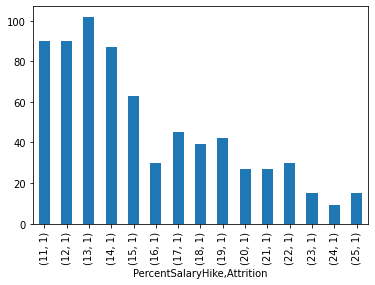

In [ ]:
hasleft.groupby(['PercentSalaryHike', 'Attrition']).size().plot.bar()

On remarque que : quand PercentSalaryHike < 16%, les gens ont tendance à s'en aller. Pareil pour ceux ayant : 17 <= PercentSalaryHike <= 19.<br>
L'idée serait que les personnes de la première observation voit leur pourcentage d'augmentation de salaire élevé à 16% et ceux de la seconde à 20%.

<AxesSubplot:xlabel='YearsWithCurrManager,Attrition'>

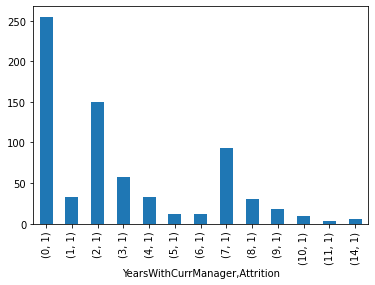

In [ ]:
hasleft.groupby(['YearsWithCurrManager', 'Attrition']).size().plot.bar()

On remarque que : quand YearsWithCurrManager = 0, les gens ont tendance à s'en aller mais cet attribut ne décrit rien seul.<br>
Il serait préférable de faire des jointures avec d'autres attributs décrivant des années aussi :

In [ ]:
hasleft.groupby(['YearsAtCompany', 'YearsWithCurrManager']).size().head()

YearsAtCompany  YearsWithCurrManager
0               0                        48
1               0                       165
                1                        12
2               0                        12
                1                         6
dtype: int64

On remarque que ceux qui ont déjà travaillé une (01) année et zéro (0) année avec leur manager actuel (on peut supposer qu'on leur a changé de manager) démissionnent.

In [ ]:
hasleft.groupby(['YearsSinceLastPromotion', 'YearsWithCurrManager']).size().head()

YearsSinceLastPromotion  YearsWithCurrManager
0                        0                       195
                         1                        21
                         2                        45
                         3                        27
                         4                        15
dtype: int64

On remarque que ceux qui ont zéro (0) année depuis qu'ils ont été promu (on peut supposer qu'ils viennent tout juste d'être promu) et 0 année avec leur manager actuel démissionnent.

In [ ]:
hasleft.groupby(['YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsAtCompany']).size().head()

YearsSinceLastPromotion  YearsWithCurrManager  YearsAtCompany
0                        0                     0                  48
                                               1                 144
                                               5                   3
                         1                     1                   9
                                               4                   3
dtype: int64

On remarque que ceux qui ont zéro (0) année depuis qu'ils ont été promu (on peut supposer qu'ils viennent tout juste d'être promu) et 0 année avec leur manager actuel démissionnent.

**Conclusion** : La plupart de ceux qui ont été fraîchement promu après un an de travail et à qui ont a changé de manager quittent HumanForYou.

<AxesSubplot:xlabel='TrainingTimesLastYear,Attrition'>

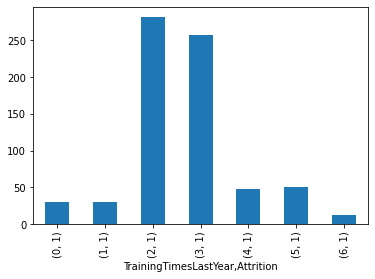

In [ ]:
hasleft.groupby(['TrainingTimesLastYear', 'Attrition']).size().plot.bar()

On remarque que : quand TrainingTimesLastYear = 2 ou 3, les gens ont tendance à s'en aller.<br>
L'idée serait que les personnes qui ont reçu 2 formations en fassent plutôt une et ceux avec 3, leur rajouter une autre.

<AxesSubplot:xlabel='round_mean_daily_spent,Attrition'>

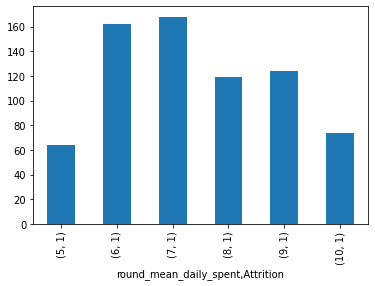

In [ ]:
hasleft.groupby(['round_mean_daily_spent', 'Attrition']).size().plot.bar()

Les employés qui travaillent moins que les horaires standards (8 heures) ont tendances à quitter.
Il serait bien d'instaurer des mesures plus strictes afin de respecter les horaires de travail, par exemple 6/7 heures deviendront 8 heures.

<AxesSubplot:xlabel='taux_abs,Attrition'>

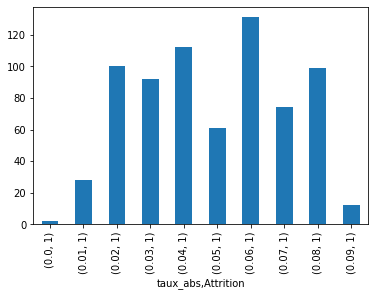

In [ ]:
hasleft.groupby(['taux_abs', 'Attrition']).size().plot.bar()

Un employé qui s'absente fréquemment se traduit par un manque d'implication.

<AxesSubplot:xlabel='StockOptionLevel,Attrition'>

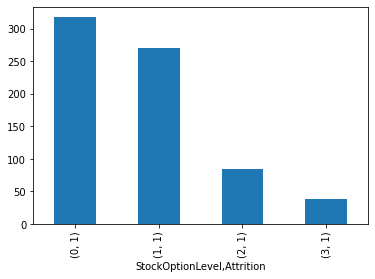

In [ ]:
hasleft.groupby(['StockOptionLevel', 'Attrition']).size().plot.bar()

Les employés avec aucune action dans l'entreprise ou avec seulement une ont tendances à s'en aller.
Il est préférable qu'on donne deux (02) actions à ceux qui n'en ont pas et trois (03) à ceux qui n'en ont qu'une seule.

<AxesSubplot:xlabel='JobInvolvement,Attrition'>

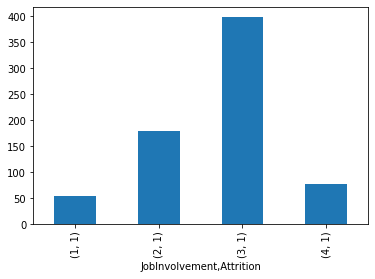

In [ ]:
hasleft.groupby(['JobInvolvement', 'Attrition']).size().plot.bar()

Comme précisé plus haut, le respect des horaires de travail, le taux d'absentéisme bas ainsi que la possession d'un certain d'actions est en étroite corrélation avec la note concernant l'implication dans le travail. Une fois que les employés respectent ces prérequis, leur note peut se voir augmenter à quatre (04) et de ce fait, ils ne seront pas enclin à démissionner.

<AxesSubplot:xlabel='BusinessTravel_Scale,Attrition'>

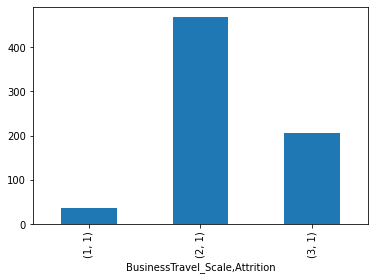

In [ ]:
hasleft.groupby(['BusinessTravel_Scale', 'Attrition']).size().plot.bar()

On remarque que ceux qui voyagent rarement ont tendance à partir.

On récupére les probabilités du choix (Oui/Non) de l’employé à partir du modèle.

In [ ]:
preds = classifier.predict(xf)
probas = classifier.predict_proba(xf)
probas

array([[0.992     , 0.008     ],
       [0.05066667, 0.94933333],
       [0.976     , 0.024     ],
       ...,
       [0.992     , 0.008     ],
       [0.98933333, 0.01066667],
       [0.99466667, 0.00533333]])

In [ ]:
#employee_id=dupli_data["EmployeeID"]
probabilities = pd.DataFrame({
     "EmployeeID":list(dupli_data["EmployeeID"]),
     "Predictions":list(preds),
     "Probabilities":list(probas)
     })

probabilities.to_csv("dataset/dupli_probabilities.csv", index = False)

In [ ]:
probs = pd.read_csv("dataset/dupli_probabilities.csv", sep=",")
probs.head()

,EmployeeID,Predictions,Probabilities
0,1,0,[0.992 0.008]
1,2,1,[0.05066667 0.94933333]
2,3,0,[0.976 0.024]
3,4,0,[0.98666667 0.01333333]
4,5,0,[0.99466667 0.00533333]


Les probabilités du Oui/Non sont côte à côté, on va les dispatcher et les mettre chacune dans sa propre colonne : 

In [ ]:
no_list = []
yes_list = []

for i in range(0, len(probabilities)):
   
    no_proba = probabilities["Probabilities"].iloc[i][0]
    yes_proba = probabilities["Probabilities"].iloc[i][1]
   
    no_list.append(no_proba)
    yes_list.append(yes_proba)

probabilities = probabilities.assign(no_proba = no_list)
probabilities = probabilities.assign(yes_proba = yes_list)

yes_preds = probabilities[probabilities['Predictions'].isin([1])]

nearest2no_yespreds = yes_preds[(yes_preds['no_proba'] < 0.50) & (yes_preds['no_proba'] > 0.10)] 
nearest2no_yespreds.sort_values(by ='no_proba', ascending = False)

,EmployeeID,Predictions,Probabilities,no_proba,yes_proba
350,351,1,"[0.4826666666666667, 0.5173333333333333]",0.482667,0.517333
2887,2888,1,"[0.4666666666666667, 0.5333333333333333]",0.466667,0.533333
3210,3211,1,"[0.4666666666666667, 0.5333333333333333]",0.466667,0.533333
2435,2436,1,"[0.4666666666666667, 0.5333333333333333]",0.466667,0.533333
1417,1418,1,"[0.45866666666666667, 0.5413333333333333]",0.458667,0.541333
...,...,...,...,...,...
2509,2510,1,"[0.10133333333333333, 0.8986666666666666]",0.101333,0.898667
853,854,1,"[0.10133333333333333, 0.8986666666666666]",0.101333,0.898667
689,690,1,"[0.10133333333333333, 0.8986666666666666]",0.101333,0.898667
2140,2141,1,"[0.10133333333333333, 0.8986666666666666]",0.101333,0.898667


In [ ]:
employeesYes2No = dupli_data["EmployeeID"].isin(nearest2no_yespreds["EmployeeID"].to_numpy())
gd2 = dupli_data[employeesYes2No]
gd2.to_csv("dataset/employeesleaningtowardsNO.csv", index = False)

In [ ]:
eyn = pd.read_csv("dataset/employeesleaningtowardsNO.csv", sep=",")
eyn

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
0,1,1,1,14,1,1.0,11,2,10.0,4,...,1,0,0,0,1,0.06,8,2.0,2,3
1,1,4,3,31,3,2.0,11,0,5.0,5,...,1,0,0,0,1,0.04,9,2.0,2,3
2,1,9,4,66,1,5.0,14,1,5.0,4,...,0,1,0,0,1,0.01,10,4.0,2,3
3,1,1,1,70,1,4.0,17,1,12.0,0,...,0,0,0,1,0,0.01,9,3.0,3,3
4,1,29,3,79,1,1.0,13,1,7.0,0,...,1,0,0,1,0,0.08,9,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1,10,4,4367,2,5.0,13,0,8.0,3,...,1,0,0,1,0,0.06,7,1.0,2,3
376,1,3,2,4369,2,5.0,14,0,9.0,2,...,0,0,0,0,1,0.08,6,1.0,2,3
377,1,7,1,4382,1,1.0,21,0,4.0,2,...,1,0,0,1,0,0.04,8,4.0,3,4
378,1,11,4,4387,1,5.0,21,0,8.0,2,...,1,0,0,0,1,0.06,10,4.0,2,4


On récupère la liste d'employés qui ont déjà travaillé un an dans cette entreprise et aucune année avec leur manager actuel :

In [ ]:
YearsWithCurrManager = eyn[(eyn['YearsAtCompany'] == 1) & (eyn['YearsWithCurrManager'] == 0) & (eyn['YearsSinceLastPromotion'] == 0)]
YearsWithCurrManagerID = YearsWithCurrManager['EmployeeID']

On leur modifie leurs années passées avec le manager actuel de 0 à 1 (en d'autres termes, on ne leur change pas leur ancien manager) :

In [ ]:
dupli_data['YearsWithCurrManager'] = np.where((dupli_data['EmployeeID'].isin(YearsWithCurrManagerID)), 1, dupli_data['YearsWithCurrManager'])

On récupère la liste d'employés qui ont fait des formations 2 et 3 fois :

In [ ]:
TrainingTimesLastYear = eyn[(eyn['TrainingTimesLastYear'] == 2) | (eyn['TrainingTimesLastYear'] == 3)]
TrainingTimesLastYearID = TrainingTimesLastYear['EmployeeID']

On leur modifie leur nombre de formations de 2 à 1 et les autres de 3 à 4 :

In [ ]:
dupli_data['TrainingTimesLastYear'] = np.where((dupli_data['EmployeeID'].isin(TrainingTimesLastYearID)) & (dupli_data['TrainingTimesLastYear'] == 2), 1, dupli_data['TrainingTimesLastYear'])

In [ ]:
dupli_data['TrainingTimesLastYear'] = np.where((dupli_data['EmployeeID'].isin(TrainingTimesLastYearID)) & (dupli_data['TrainingTimesLastYear'] == 3), 4, dupli_data['TrainingTimesLastYear'])

On récupère la liste d'employés qui ont une note de 3 pour leur implication dans leur travail.
On leur attribue une note supérieure de 4 :

In [ ]:
JobInvolvement = eyn[(eyn['JobInvolvement'] == 3)]
JobInvolvementID = JobInvolvement['EmployeeID']
dupli_data['JobInvolvement'] = np.where((dupli_data['EmployeeID'].isin(JobInvolvementID)) & (dupli_data['JobInvolvement'] == 3), 4, dupli_data['JobInvolvement'])

On récupère la liste d'employés qui travaillent 6 ou 7 heures.
On les réajuste aux horaires standards de travail dans l'entreprise :

In [ ]:
MeanTimeSpentAtWork = eyn[(eyn['round_mean_daily_spent'] == 6) | (eyn['round_mean_daily_spent'] == 7)]
MeanTimeSpentAtWorkID = MeanTimeSpentAtWork['EmployeeID']
dupli_data['round_mean_daily_spent'] = np.where((dupli_data['EmployeeID'].isin(MeanTimeSpentAtWorkID)) & (dupli_data['round_mean_daily_spent'].isin([6,7 ])), 8, dupli_data['round_mean_daily_spent'])

On récupère la liste d'employés qui ont un certain taux d'absentéisme et on fait en sorte qu'ils ne s'absentent plus.

In [ ]:
AbsenteeismRate = eyn[(eyn['taux_abs'].isin([0.03, 0.04, 0.05, 0.06, 0.07, 0.08]))]
AbsenteeismRateID = AbsenteeismRate['EmployeeID']

dupli_data['taux_abs'] = np.where((dupli_data['EmployeeID'].isin(AbsenteeismRateID)) & (dupli_data['taux_abs'].isin([0.03, 0.04, 0.05, 0.06, 0.07, 0.08])), 0, dupli_data['taux_abs'])

On récupère la liste d'employés qui voyagent rarement et on fait en sorte qu'ils ne voyagent plus.

In [ ]:
BusinessTravel_Scale = eyn[(eyn['BusinessTravel_Scale'] == 2) ]
BusinessTravel_ScaleID = BusinessTravel_Scale['EmployeeID']
dupli_data['BusinessTravel_Scale'] = np.where((dupli_data['EmployeeID'].isin(BusinessTravel_ScaleID)) & (dupli_data['BusinessTravel_Scale'].isin([2 ])), 1, dupli_data['BusinessTravel_Scale'])

On récupère la liste d'employés qui ont seulement une action ou aucune dans l'entreprise.
Ceux avec aucune se voit attribuer 2 et ceux avec une seule auront 3.

In [ ]:
StockOptionLevel = eyn[(eyn['StockOptionLevel'] == 0) | (eyn['StockOptionLevel'] == 1)]
StockOptionLevelID = StockOptionLevel['EmployeeID']
dupli_data['StockOptionLevel'] = np.where((dupli_data['EmployeeID'].isin(StockOptionLevelID)) & (dupli_data['StockOptionLevel'].isin([0])), 2, dupli_data['StockOptionLevel'])

dupli_data['StockOptionLevel'] = np.where((dupli_data['EmployeeID'].isin(StockOptionLevelID)) & (dupli_data['StockOptionLevel'].isin([1])), 3, dupli_data['StockOptionLevel'])

On récupère la liste d'employés qui ont un pourcentage d'augmentation de salaire de [11, 12, 13, 14, 15, 17, 18, 19] :

In [ ]:
PercentSalaryHike = eyn[(eyn["PercentSalaryHike"].isin([11, 12, 13, 14, 15, 17, 18, 19]))]
PercentSalaryHikeID = PercentSalaryHike['EmployeeID']

On leur modifie leur pourcentage d'augmentation de salaire à 16% pour ceux qui avaient [11, 12, 13, 14, 15] et à 20% pour ceux qui avaient [17, 18, 19] : 

In [ ]:
dupli_data['PercentSalaryHike'] = np.where((dupli_data['EmployeeID'].isin(PercentSalaryHikeID)) & (dupli_data['PercentSalaryHike'].isin([11, 12, 13, 14, 15])), 16, dupli_data['PercentSalaryHike'])

In [ ]:
dupli_data['PercentSalaryHike'] = np.where((dupli_data['EmployeeID'].isin(PercentSalaryHikeID)) & (dupli_data['PercentSalaryHike'].isin([17, 18, 19])), 20, dupli_data['PercentSalaryHike'])

On peut vérifier si les lignes ont été modifiées pour chaque attribut touché :

In [ ]:
dupli_data.loc[(dupli_data['EmployeeID'].isin(YearsWithCurrManagerID))]

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
69,1,1,1,70,1,4.0,20,3,12.0,0,...,0,0,0,1,0,0.01,9,3.0,4,3
105,1,28,2,106,5,1.0,21,3,1.0,4,...,0,0,0,1,0,0.00,9,3.0,1,4
112,1,10,2,113,1,1.0,16,3,1.0,1,...,0,0,0,0,1,0.00,5,2.0,4,3
181,1,22,2,182,2,3.0,16,2,12.0,1,...,0,1,0,1,0,0.00,8,3.0,2,3
405,1,1,3,406,2,1.0,16,3,1.0,1,...,0,1,0,0,1,0.02,8,4.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,1,6,2,3905,2,1.0,16,2,1.0,1,...,0,0,0,1,0,0.00,8,3.0,2,3
3939,1,9,4,3940,2,2.0,16,2,10.0,1,...,0,0,0,0,1,0.00,5,3.0,4,3
3994,1,2,3,3995,3,0.0,16,3,2.0,1,...,0,0,0,0,1,0.00,5,1.0,4,3
4061,1,8,1,4062,4,1.0,16,3,1.0,1,...,0,0,0,0,1,0.09,5,2.0,4,3


In [ ]:
dupli_data.loc[(dupli_data['EmployeeID'].isin(TrainingTimesLastYearID))]

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
105,1,28,2,106,5,1.0,21,3,1.0,4,...,0,0,0,1,0,0.0,9,3.0,1,4
108,1,16,1,109,1,1.0,16,2,8.0,4,...,1,0,0,1,0,0.0,8,2.0,4,3
110,1,8,3,111,1,2.0,20,2,8.0,1,...,0,0,0,1,0,0.0,8,3.0,2,4
112,1,10,2,113,1,1.0,16,3,1.0,1,...,0,0,0,0,1,0.0,5,2.0,4,3
120,1,7,3,121,1,8.0,25,3,9.0,4,...,0,0,1,0,1,0.0,8,4.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,1,10,4,4367,2,5.0,16,2,8.0,4,...,1,0,0,1,0,0.0,8,1.0,2,3
4368,1,3,2,4369,2,5.0,16,2,9.0,1,...,0,0,0,0,1,0.0,8,1.0,2,3
4381,1,7,1,4382,1,1.0,21,2,4.0,1,...,1,0,0,1,0,0.0,8,4.0,4,4
4386,1,11,4,4387,1,5.0,21,2,8.0,1,...,1,0,0,0,1,0.0,10,4.0,2,4


In [ ]:
dupli_data.loc[(dupli_data['EmployeeID'].isin(PercentSalaryHikeID))]

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
13,1,1,1,14,1,1.0,16,2,10.0,4,...,1,0,0,0,1,0.00,8,2.0,2,3
30,1,4,3,31,3,2.0,16,2,5.0,5,...,1,0,0,0,1,0.00,9,2.0,2,3
65,1,9,4,66,1,5.0,16,3,5.0,4,...,0,1,0,0,1,0.01,10,4.0,2,3
69,1,1,1,70,1,4.0,20,3,12.0,0,...,0,0,0,1,0,0.01,9,3.0,4,3
78,1,29,3,79,1,1.0,16,3,7.0,0,...,1,0,0,1,0,0.00,9,1.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,1,10,2,4358,2,1.0,20,2,10.0,1,...,1,0,0,1,0,0.09,8,4.0,4,3
4362,1,5,3,4363,1,1.0,16,2,14.0,1,...,0,0,0,0,1,0.00,8,4.0,4,3
4366,1,10,4,4367,2,5.0,16,2,8.0,4,...,1,0,0,1,0,0.00,8,1.0,2,3
4368,1,3,2,4369,2,5.0,16,2,9.0,1,...,0,0,0,0,1,0.00,8,1.0,2,3


## 3.3 Remodélisation

La dernière étape de ce Notebook consiste à comparer les résultats des deux modèles afin d'obtenir une progression sur la baisse du turn-over.

On exporte le dataset final avec les valeurs modifiées qui sont susceptibles de faire baisser le turn-over :

In [ ]:
dupli_data.to_csv('dataset/finaldataset.csv', index = False)

In [ ]:
firstdataset = pd.read_csv("dataset/dupli_data.csv", sep = ",")
finaldataset = pd.read_csv("dataset/finaldataset.csv", sep = ",")

In [ ]:
#Encode labels
#attrition_scalemapper = {'Yes': 1, 'No': 0}
#firstdataset["Attrition"] = firstdataset["Attrition"].replace(attrition_scalemapper)
firstdataset.head()

,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,taux_abs,round_mean_daily_spent,JobSatisfaction,JobInvolvement,PerformanceRating
0,0,6,2,1,1,1.0,11,0,1.0,6,...,0,0,0,1,0,0.07,6,4.0,3,3
1,1,10,1,2,1,0.0,23,1,6.0,3,...,1,0,0,1,0,0.05,7,2.0,2,4
2,0,17,4,3,4,1.0,15,3,5.0,2,...,0,1,0,0,1,0.03,6,2.0,3,3
3,0,2,5,4,3,3.0,11,3,13.0,5,...,0,0,0,0,1,0.06,6,4.0,2,3
4,0,10,1,5,1,4.0,12,2,9.0,2,...,0,1,0,0,1,0.02,7,1.0,3,3


In [ ]:
x1 = firstdataset.drop(columns=['EmployeeID','Attrition','TotalWorkingYears','YearsAtCompany', 'DistanceFromHome', 'AgeRange_Scale', 'NumCompaniesWorked', 'JobSatisfaction']).values
y1 = firstdataset['Attrition'].values

x2 = finaldataset.drop(columns=['EmployeeID','Attrition','TotalWorkingYears','YearsAtCompany', 'DistanceFromHome', 'AgeRange_Scale', 'NumCompaniesWorked', 'JobSatisfaction']).values
y2 = finaldataset['Attrition'].values

classifier = RandomForestClassifier(n_estimators = 375, random_state = 42)
classifier = classifier.fit(x1, y1)
prediction1 = classifier.predict(x1)

In [ ]:
print(pd.DataFrame(confusion_matrix(y1, prediction1), columns = ['predicted_No', 'predicted_Yes'], index=['actual_No', 'actual_Yes']))

            predicted_No  predicted_Yes
actual_No           3699              0
actual_Yes             0            711


On a 0 faux négatifs et 0 vrais négatifs.

On effectue une nouvelle prédiction sur notre jeu de données modifié.
Nous détecterons si nos modifications ont porté leurs fruits si des faux négatifs (inévitablement des vrais négatifs aussi) apparaissent dans notre matrice de confusion :

In [ ]:
prediction2 = classifier.predict(x2)

In [ ]:
print(pd.DataFrame(confusion_matrix(y2, prediction2), columns = ['predicted_No', 'predicted_Yes'], index=['actual_No', 'actual_Yes']))

            predicted_No  predicted_Yes
actual_No           3699              0
actual_Yes           188            523


Début : 16,1 % <br>
Résultat : 188 faux négatifs (11,8%)

## 3.4 Résultats obtenus

Nous allons synthétiser nos résultats à travers des propositions pour l'entreprise afin de diminuer le taux de turn-over :

- Accroître le pourcentage d'augmentation salariale lors d'une promotion.
- Réviser le système de rotation managérial.
- Ajuster le nombre de formations en fonction des compétences d'un employé.
- Encourager l'implication des employés dans le travail.

# 4. Conclusion

Nous avons fait en sorte de vous sélectionner une panoplie d'attributs (solutions) qui vous permettraient d'intervenir sur plusieurs facettes de votre problématique. Une liste de propositions vous est fournie et maintenant libre à vous de les exploiter.